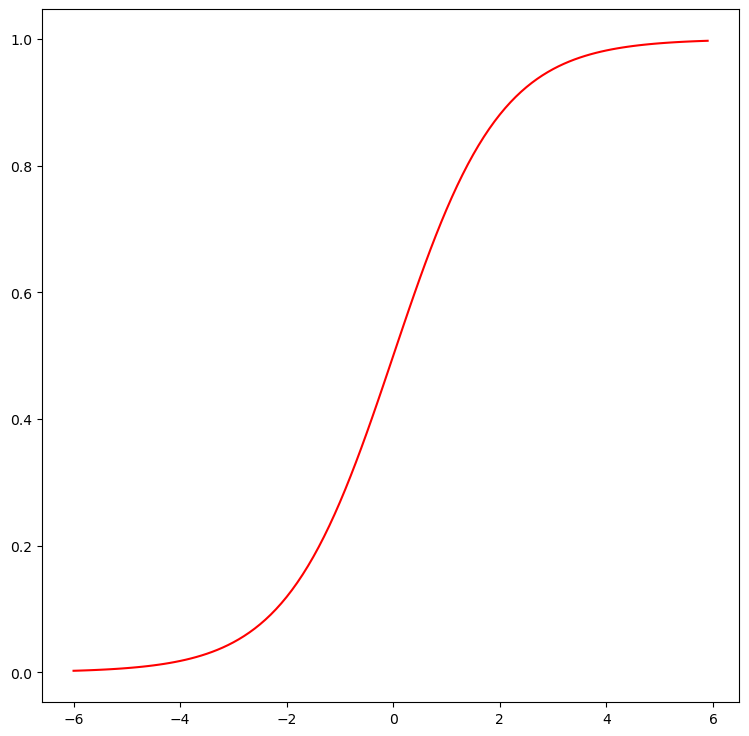

In [4]:
#Linear Regression -- y=mx+c or 
#y(target variable)=slope*x(independent variable)+intercept+error

#Logistics Regression
#Sigmoid Function ---- S(t)=1/(1+e raise to the power -t)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Plotting the sigmoid function or the logistic regression graph 
#using mathematical formaula
plt.figure(figsize=(9,9))

# Define the sigmoid function or Logistic Regression mathematical formula or function
def sigmoid(t):                          
    return (1/(1 + np.e**(-t)))  

#plot_range or t value or x axis value
plot_range=np.arange(-6,6,0.1)
#plot_range
#y or S(t)
y_values=sigmoid(plot_range)
# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,          # Predicted values
         color="red");

#The sigmoid function is bounded below by 0 and bounded above by 1. 


In [ ]:
"""
The sigmoid function is bounded below by 0 and bounded above by 1. 
In logistic regression, the output is interpreted as a probability: 
the probability that an observation belongs to the second of the two 
categories being modeled. When the linear combination of variables 
produces positive numbers, the resulting probability is greater than 0.5 
and when it produces negative numbers, the probability is less than 0.5.

We won't go deeper into the details behind how logistic regression works, 
but instead focus on how to use it in Python. The most important thing to 
know is that logistic regression outputs probabilities that we can use to 
classify observations.

"""

In [9]:
"""
We'll start by loading the data and then carrying out a few of the same
preprocessing tasks
"""
#Read the data
titanic_train=pd.read_csv("D:\\Downloads\\train.csv")
#titanic_train.head()
# Convert cabin to str
char_cabin = titanic_train["Cabin"].astype(str)
#print(char_cabin)

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter
#new_Cabin
titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [ ]:
#We are repalcing missing age data from Age column with median Age  taking its value as 28
# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 
#Fare column 
new_fare_var = np.where(titanic_train["Fare"].isnull(), # Logical check
                       50,                         # Value if check is true
                       titanic_train["Fare"])     # Value if check is false

titanic_train["Fare"] = new_fare_var



In [11]:
'''
    Now we are ready to use a logistic regression model to predict survival. 
The scikit-learn library has a logistic regression function in the learn model
subfolder. 
Let's make a logistic regression model that only uses the 
Sex variable as a predictor.
Before creating a model with the sex variable, 
we need to convert to a real number because sklearn's machine learning 
functions only deal with real numbers. We can convert a categorical variable 
like into a number using the sklearn preprocessing function LabelEncoder():
'''

import scipy.stats as stats
from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder #LabelEncoder is used to convert string values to numerical values
label_encoder = preprocessing.LabelEncoder()
# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])
#encoded_sex
# Initialize logistic regression model
log_model=linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

"""
The logistic regression model coefficients look similar to the output we saw 
for linear regression. We can see the model produced a positive intercept 
value and a weight of -2.4459 on gender. 
Let's use the model to make predictions on the test set:
"""

[1.01628767]
[[-2.44597988]]


In [13]:
#Let's use the model to make predictions on the test set:
preds = log_model.predict_proba(X=pd.DataFrame(encoded_sex))
preds =pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]
# Generate table of predictions vs Sex
print(pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"]))
"""
Note: Use model.predict_proba() to get the predicted class probabilities. 
Use model.predict() to get the predicted classes.

The table shows that the model predicted a survival chance of roughly 
19% for males and 73% for females. If we used this simple model to predict survival,
 we'd end up predicting that all women survived and that all men died. 
 Let's make a more complicated model that includes a few more variables from 
 the titanic training set:
"""

Survival_prob  0.193147  0.734249
Sex                              
female                0       314
male                577         0


In [26]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
#titanic_train['new_Cabin']=new_Cabin
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T
#train_features.to_csv("D:\\train_features1.csv")

In [27]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])
# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[3.77785761]
[[-0.92520536 -0.09750817 -2.52386048 -0.03122094]]


In [28]:
"""
Next, let's make class predictions using this model and then compare the 
predictons to the actual values:
"""
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
print(pd.crosstab(preds,titanic_train["Survived"]))
print("*********************************************")
"""
The table below shows the classes our model predicted vs. true values of the 
Survived variable. This table of predicted vs. actual values is known as a 
confusion matrix.
"""
"""
The Confusion Matrix
The confusion matrix is a common tool for assessing the results of classification. 
Each cell tells us something different about our predictions versus the true values.
The bottom right corner indicates the True positives: people the model 
predicted to survive who actually did survive. 

The bottom left cell indicates the false positives: people for whom the model 
predicted survival who did not actually survive. The top left cell indicates 
the true negatives: people correctly identified as non survivors. 
Finally, the top right cell shows the false negatives: passengers the model 
identified as non survivors who actually did survive.
"""

Survived    0    1
row_0             
0         457   89
1          92  253
*********************************************


In [29]:
"""
We can calculate the overall prediction accuracy from the matrix by adding 
the total number of correct predictions and dividing by the total number of 
predictions. You can also get the accuracy of a model using the 
scikit-learn model.score() function:
"""
print(log_model.score(X = train_features ,
                y = titanic_train["Survived"]))

0.7968574635241302


In [30]:
from sklearn import metrics

# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       549
           1       0.73      0.74      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [44]:
# Read and prepare test data

from sklearn.model_selection import train_test_split

# Read the data
data=pd.read_csv("D:\\Downloads\\train.csv")

# Splitting data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, titanic_test = train_test_split(temp_data, test_size=0.5, random_state=42)


char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 


# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

# Make test set predictions
test_preds = log_model.predict(X=test_features)
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})
#submission
print(log_model.score(X = test_features ,y = titanic_test["Survived"]))


0.7835820895522388
